In [200]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt


%matplotlib inline

In [229]:
def process_rate_file(filepath, prefix):
   # Skip first row when reading CSV
   df = pd.read_csv(filepath, names=['timestamp', 'data'], skiprows=1)
   df['timestamp'] = df['timestamp'].astype(np.int64)
   
   df[['Pitch', 'Roll', 'Yaw']] = df['data'].str.extract(r'data=\[(.*?)\]')[0].str.split(',', expand=True).astype(float)
   
   first_timestamp = df['timestamp'].iloc[0]
   df['timestamp'] = df['timestamp'].values / 1e9
   
   df = df.rename(columns={
       'Pitch': f'{prefix}_Pitch',
       'Roll': f'{prefix}_Roll', 
       'Yaw': f'{prefix}_Yaw'
   })
   
   return df[['timestamp', f'{prefix}_Pitch', f'{prefix}_Roll', f'{prefix}_Yaw']]

def process_rc_file(filepath):
   df = pd.read_csv(filepath, names=['timestamp', 'data'], skiprows=1)
   df['timestamp'] = df['timestamp'].astype(np.int64)
   
   channel_values = df['data'].str.extract(r'data=\[(.*?)\]')[0].str.split(',', expand=True)
   
   # Map channels to their functions
   df['RC_roll'] = channel_values[0].astype(float)      # CH1
   df['RC_pitch'] = channel_values[1].astype(float)     # CH2
   df['RC_throttle'] = channel_values[2].astype(float)  # CH3
   df['RC_yaw'] = channel_values[3].astype(float)       # CH4
   df['RC_aux1'] = channel_values[4].astype(float)      # CH5
   df['RC_aux2'] = channel_values[5].astype(float)      # CH6
   df['RC_aux3'] = channel_values[6].astype(float)      # CH7
   df['RC_aux4'] = channel_values[7].astype(float)      # CH8
   
   first_timestamp = df['timestamp'].iloc[0]
   df['timestamp'] = df['timestamp'].values / 1e9
   
   return df[['timestamp', 'RC_roll', 'RC_pitch', 'RC_throttle', 'RC_yaw', 
              'RC_aux1', 'RC_aux2', 'RC_aux3', 'RC_aux4']]

def process_pid_file(filepath):
    df = pd.read_csv(filepath, names=['timestamp', 'data'], skiprows=1)
    df['timestamp'] = df['timestamp'].astype(np.int64)
    
    # Extract PID values with the correct pattern
    df['PID_p_pitch'] = df['data'].str.extract(r'p_pitch=([\d.-]+)').astype(float)
    df['PID_p_roll'] = df['data'].str.extract(r'p_roll=([\d.-]+)').astype(float)
    df['PID_p_yaw'] = df['data'].str.extract(r'p_yaw=([\d.-]+)').astype(float)
    df['PID_i_pitch'] = df['data'].str.extract(r'i_pitch=([\d.-]+)').astype(float)
    df['PID_i_roll'] = df['data'].str.extract(r'i_roll=([\d.-]+)').astype(float)
    df['PID_i_yaw'] = df['data'].str.extract(r'i_yaw=([\d.-]+)').astype(float)
    df['PID_d_pitch'] = df['data'].str.extract(r'd_pitch=([\d.-]+)').astype(float)
    df['PID_d_roll'] = df['data'].str.extract(r'd_roll=([\d.-]+)').astype(float)
    df['PID_d_yaw'] = df['data'].str.extract(r'd_yaw=([\d.-]+)').astype(float)
    
    first_timestamp = df['timestamp'].iloc[0]
    df['timestamp'] = df['timestamp'].values / 1e9
    
    return df[['timestamp', 'PID_p_roll', 'PID_i_roll', 'PID_d_roll', 
               'PID_p_pitch', 'PID_i_pitch', 'PID_d_pitch',
               'PID_p_yaw', 'PID_i_yaw', 'PID_d_yaw']]

def process_euler_file(filepath):
   df = pd.read_csv(filepath, names=['timestamp', 'data'], skiprows=1)
   df['timestamp'] = df['timestamp'].astype(np.int64)
   
   df['Euler_pitch'] = df['data'].str.extract(r'pitch=([\d.-]+)').astype(float)
   df['Euler_roll'] = df['data'].str.extract(r'roll=([\d.-]+)').astype(float)
   df['Euler_yaw'] = df['data'].str.extract(r'yaw=([\d.-]+)').astype(float)
   
   first_timestamp = df['timestamp'].iloc[0]
   df['timestamp'] = df['timestamp'].values / 1e9
   
   return df[['timestamp', 'Euler_pitch', 'Euler_roll', 'Euler_yaw']]

def process_motors_file(filepath):
   df = pd.read_csv(filepath, names=['timestamp', 'data'], skiprows=1)
   df['timestamp'] = df['timestamp'].astype(np.int64)
   
   df['Motor_FR'] = df['data'].str.extract(r'front_right=([\d.-]+)').astype(float)
   df['Motor_BR'] = df['data'].str.extract(r'back_right=([\d.-]+)').astype(float)
   df['Motor_FL'] = df['data'].str.extract(r'front_left=([\d.-]+)').astype(float)
   df['Motor_BL'] = df['data'].str.extract(r'back_left=([\d.-]+)').astype(float)
   
   first_timestamp = df['timestamp'].iloc[0]
   df['timestamp'] = df['timestamp'].values / 1e9
   
   return df[['timestamp', 'Motor_FR', 'Motor_BR', 'Motor_FL', 'Motor_BL']]

def process_imu_file(filepath):
   df = pd.read_csv(filepath, names=['timestamp', 'data'], skiprows=1)
   df['timestamp'] = df['timestamp'].astype(np.int64)
   
   # Extract angular velocity
   df['ang_vel_x'] = df['data'].str.extract(r'angular_velocity=geometry_msgs\.msg\.Vector3\(x=([\d.-]+)').astype(float)
   df['ang_vel_y'] = df['data'].str.extract(r'y=([\d.-]+),\s*z=[\d.-]+\)').astype(float)
   df['ang_vel_z'] = df['data'].str.extract(r'z=([\d.-]+)\),\s*angular_velocity_covariance').astype(float)
   
   # Extract linear acceleration
   df['lin_acc_x'] = df['data'].str.extract(r'linear_acceleration=geometry_msgs\.msg\.Vector3\(x=([\d.-]+)').astype(float)
   df['lin_acc_y'] = df['data'].str.extract(r'y=([\d.-]+),\s*z=[\d.-]+\)').astype(float) 
   df['lin_acc_z'] = df['data'].str.extract(r'z=([\d.-]+)\),\s*linear_acceleration_covariance').astype(float)
   
   first_timestamp = df['timestamp'].iloc[0]
   df['timestamp'] = df['timestamp'].values / 1e9
   
   return df[['timestamp', 'ang_vel_x', 'ang_vel_y', 'ang_vel_z', 'lin_acc_x', 'lin_acc_y', 'lin_acc_z']]

In [230]:
file_dir = os.getcwd() + '/Input Files' + '/Acro'

# Reading all the files:
desire_df = process_rate_file(file_dir +'/_desire_rate.csv', 'Rate_des')
estimated_df = process_rate_file(file_dir +'/_estimated_rate.csv', 'Rate_est')
rc_df = process_rc_file(file_dir +'/_rc_channel_data.csv')
pid_df = process_pid_file(file_dir + '/_PID_rate.csv')
euler_df = process_euler_file(file_dir + '/_euler_angles_data.csv')
motors_df = process_motors_file(file_dir + '/_motor_pwm.csv')
imu_df = process_imu_file(file_dir + '/_pololu_imu_data.csv')

Analyzing Pitch Axis:

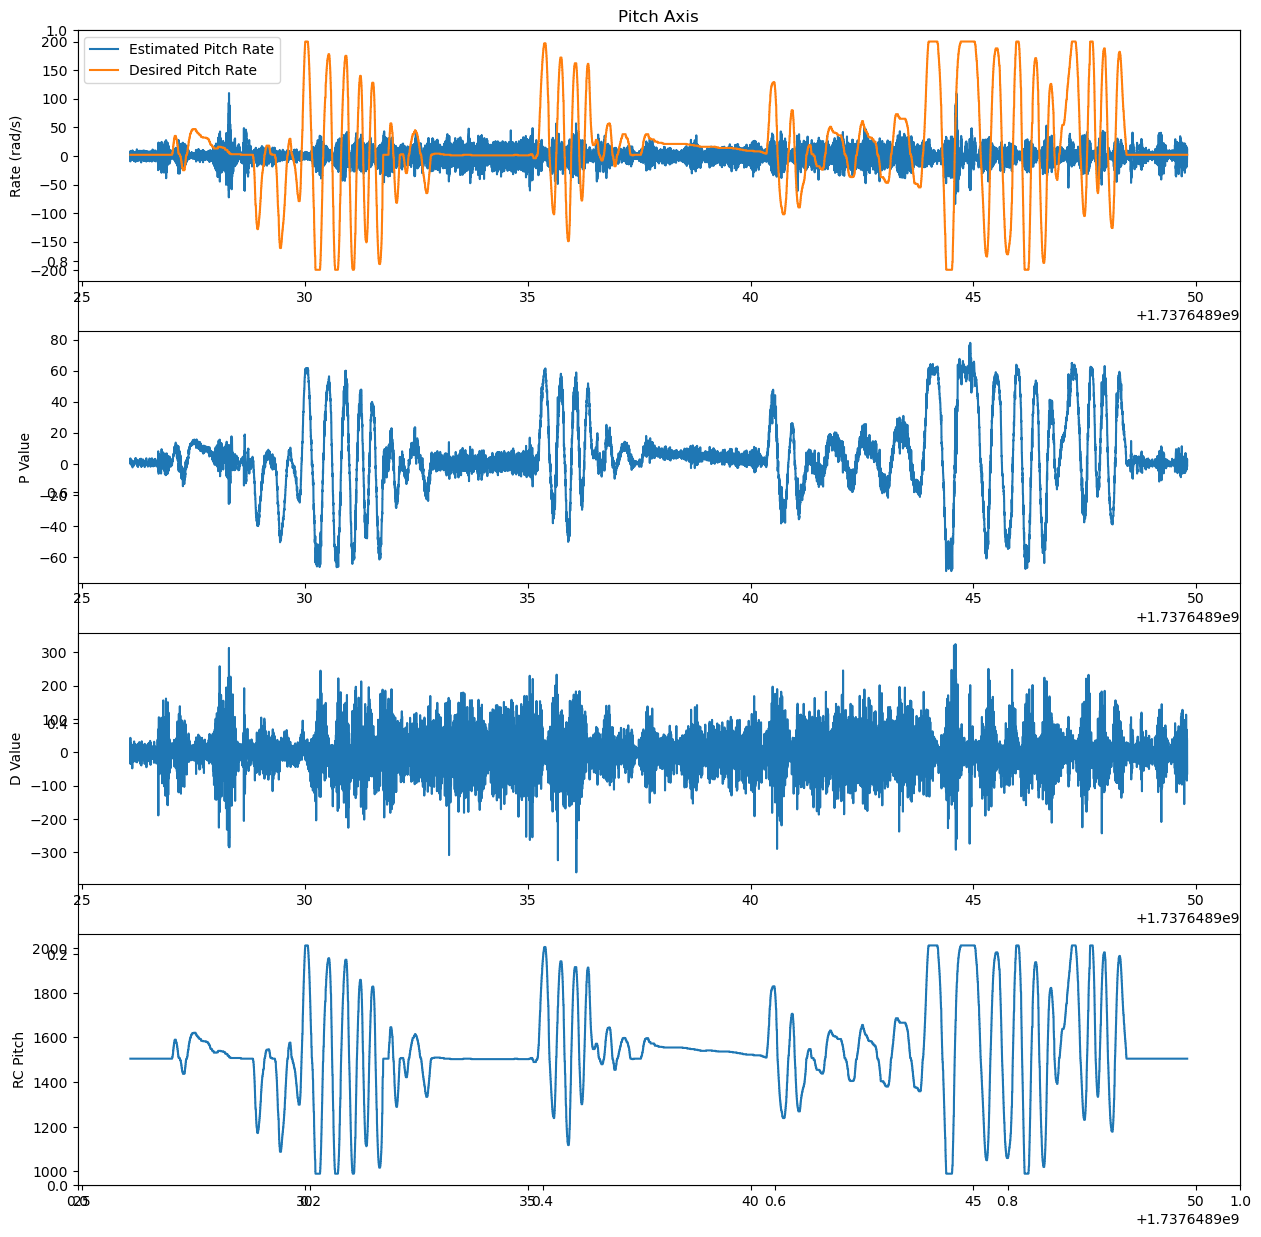

In [231]:
plt.figure(figsize=(15, 15))
plt.title('Pitch Axis')
plt.subplot(4, 1, 1)
plt.plot(estimated_df['timestamp'], estimated_df['Rate_est_Pitch'], label='Estimated Pitch Rate')
plt.plot(desire_df['timestamp'], desire_df['Rate_des_Pitch'], label='Desired Pitch Rate')

plt.ylabel('Rate (rad/s)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(pid_df['timestamp'], pid_df['PID_p_pitch'], label='P Pitch')

plt.ylabel('P Value')

plt.subplot(4, 1, 3)
plt.plot(pid_df['timestamp'], pid_df['PID_d_pitch'], label='D Pitch')

plt.ylabel('D Value')

plt.subplot(4, 1, 4)
plt.plot(rc_df['timestamp'], rc_df['RC_pitch'], label='Pitch')

plt.ylabel('RC Pitch')

plt.show()

Analyzing Roll Axis:

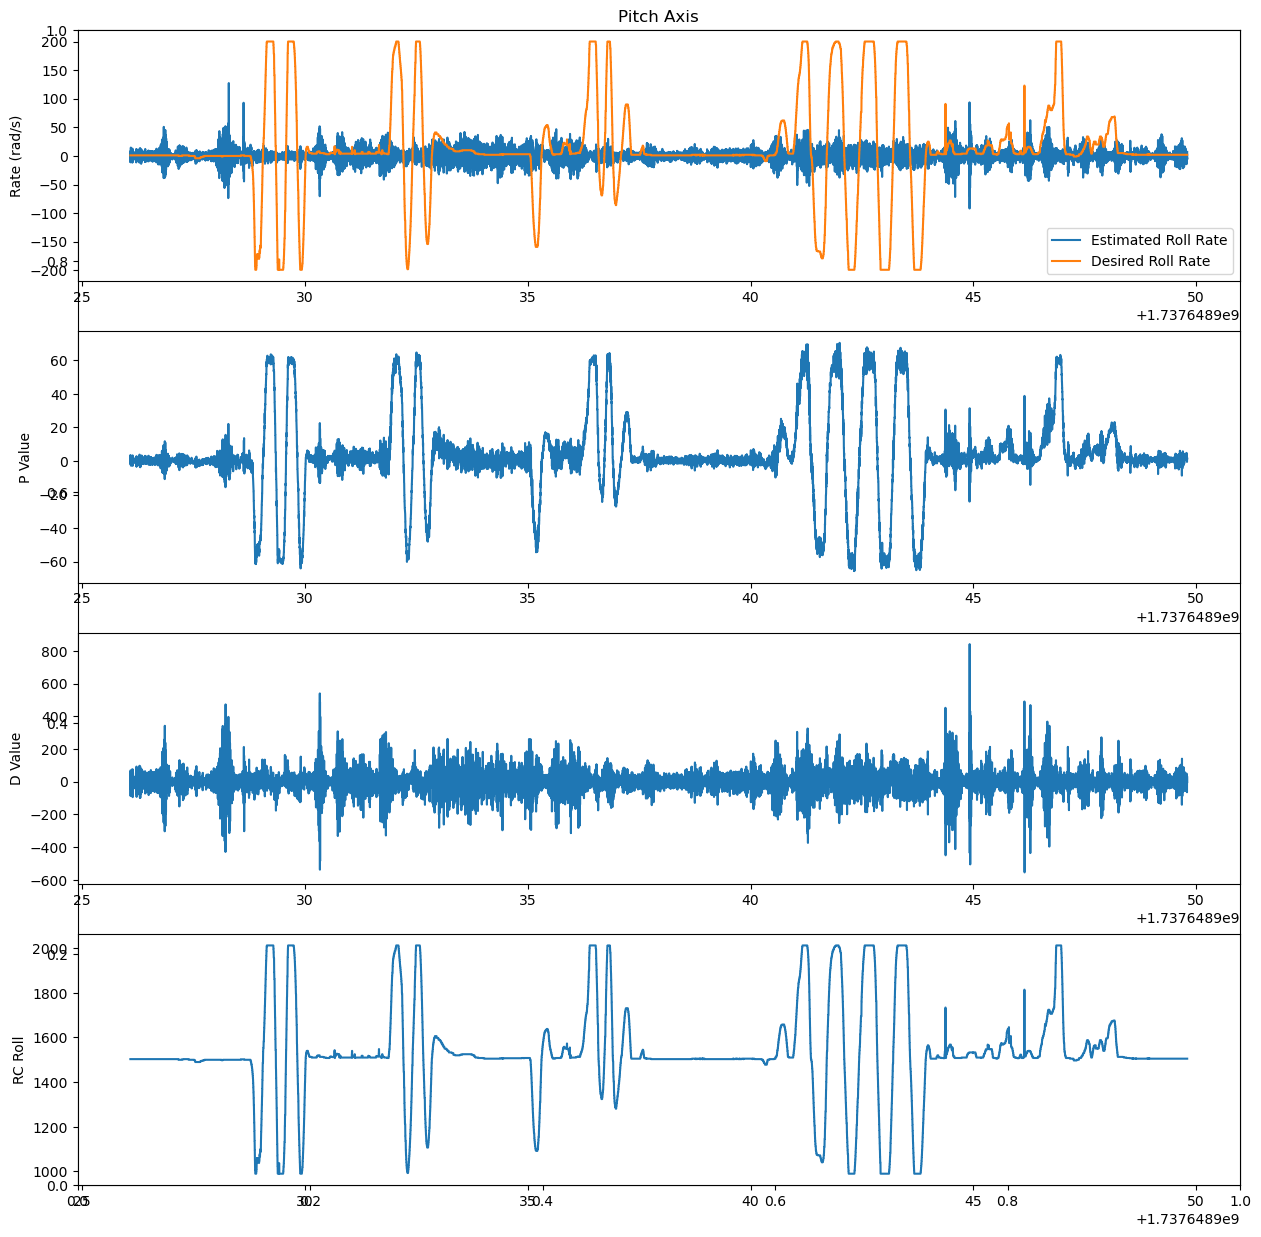

In [232]:
plt.figure(figsize=(15, 15))
plt.title('Pitch Axis')
plt.subplot(4, 1, 1)
plt.plot(estimated_df['timestamp'], estimated_df['Rate_est_Roll'], label='Estimated Roll Rate')
plt.plot(desire_df['timestamp'], desire_df['Rate_des_Roll'], label='Desired Roll Rate')

plt.ylabel('Rate (rad/s)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(pid_df['timestamp'], pid_df['PID_p_roll'], label='P Roll')

plt.ylabel('P Value')

plt.subplot(4, 1, 3)
plt.plot(pid_df['timestamp'], pid_df['PID_d_roll'], label='D Roll')

plt.ylabel('D Value')

plt.subplot(4, 1, 4)
plt.plot(rc_df['timestamp'], rc_df['RC_roll'], label='Roll')

plt.ylabel('RC Roll')

plt.show()

Analyzing Yaw Axis:

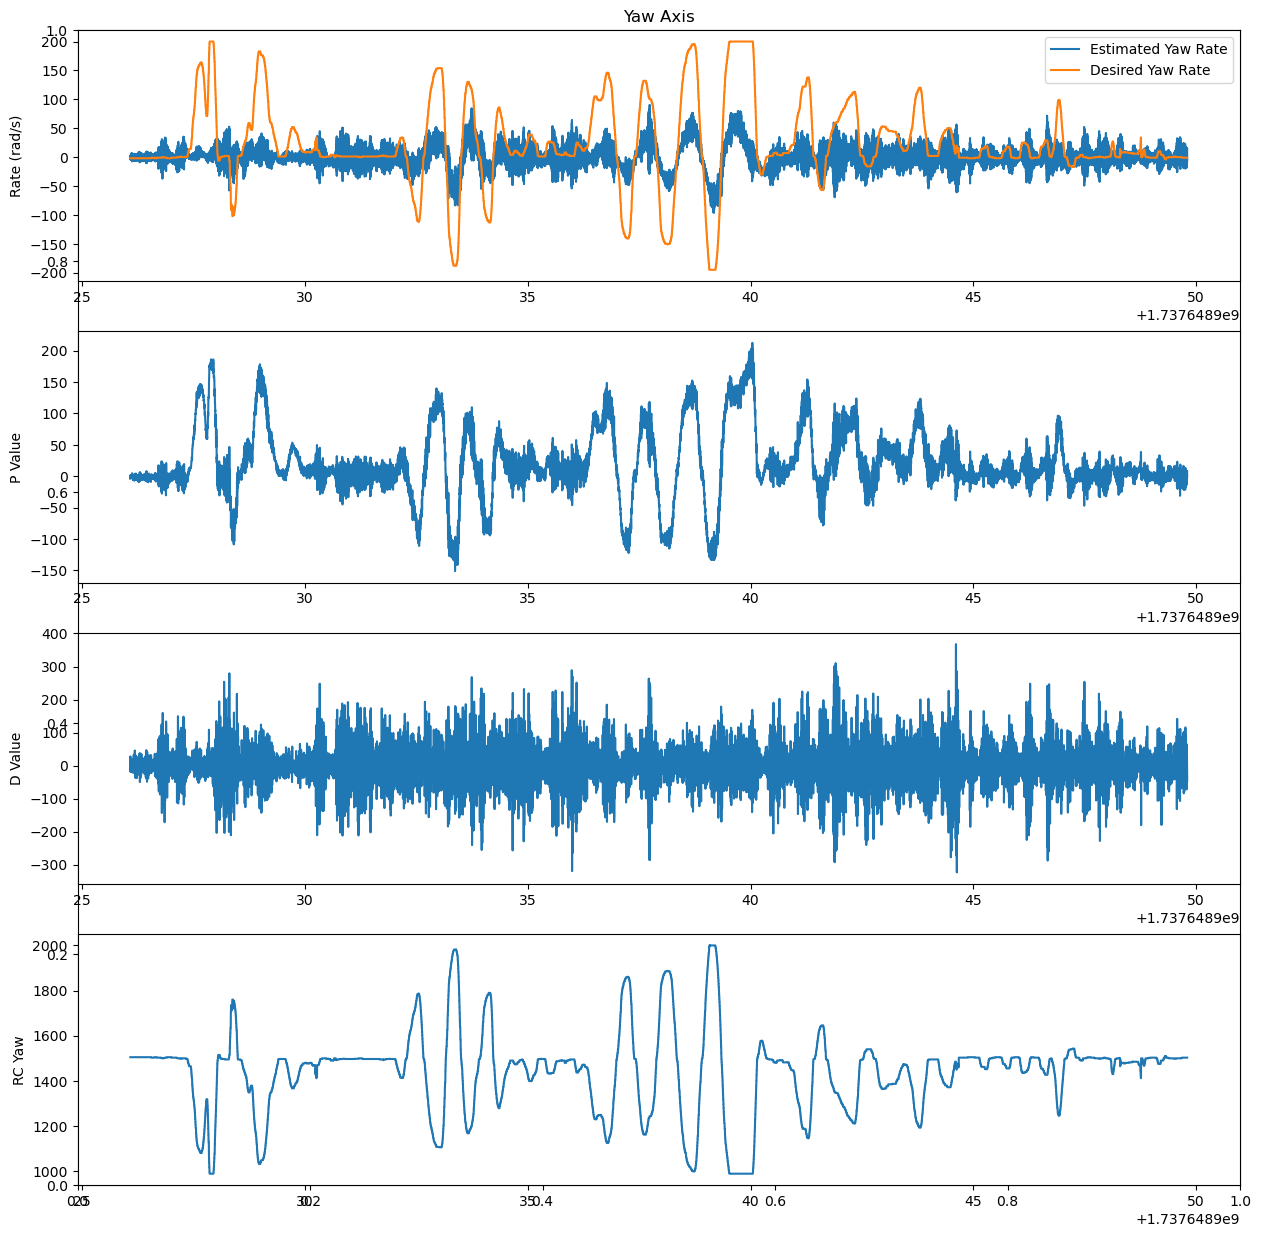

In [277]:
plt.figure(figsize=(15, 15))
plt.title('Yaw Axis')
plt.subplot(4, 1, 1)
plt.plot(estimated_df['timestamp'], estimated_df['Rate_est_Yaw'], label='Estimated Yaw Rate')
plt.plot(desire_df['timestamp'], desire_df['Rate_des_Yaw'], label='Desired Yaw Rate')

plt.ylabel('Rate (rad/s)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(pid_df['timestamp'], pid_df['PID_p_yaw'], label='P Yaw')

plt.ylabel('P Value')

plt.subplot(4, 1, 3)
plt.plot(pid_df['timestamp'], pid_df['PID_d_yaw'], label='D Yaw')

plt.ylabel('D Value')

plt.subplot(4, 1, 4)
plt.plot(rc_df['timestamp'], rc_df['RC_yaw'], label='Yaw')

plt.ylabel('RC Yaw')

plt.show()

In [248]:
from scipy import signal

def compute_fft_ros(imu_df, sens = 'gyro', max_freq=100, chunk_size=8192):
    # Convert ROS timestamps from ns to seconds
    timestamps = imu_df['timestamp'].values
    dt = np.median(np.diff(timestamps))
    
    ffts = {}
    for axis in ['x', 'y', 'z']:
        if (sens == 'gyro'):
            signal_data = imu_df[f'ang_vel_{axis}'].values
        elif (sens == 'acc'):
            signal_data = imu_df[f'lin_acc_{axis}'].values
        n_chunks = len(signal_data) // chunk_size
        chunks_fft = []
        
        for i in range(n_chunks):
            chunk = signal_data[i*chunk_size:(i+1)*chunk_size]
            chunk_windowed = chunk * signal.windows.hann(len(chunk))
            chunk_fft = np.fft.fft(chunk_windowed)
            chunks_fft.append(np.abs(chunk_fft))
        
        avg_fft = np.mean(chunks_fft, axis=0)
        ffts[axis.upper()] = avg_fft
    
    freqs = np.fft.fftfreq(chunk_size, dt)
    freq_mask = (freqs >= 0) & (freqs <= max_freq)
    
    return freqs[freq_mask], {k: v[freq_mask] for k, v in ffts.items()}

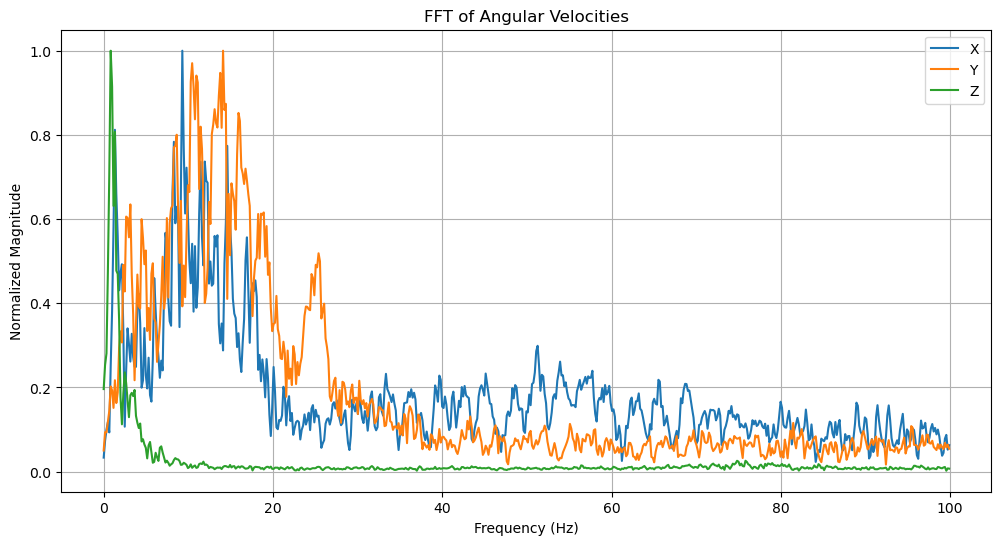

In [253]:
freqs, ffts = compute_fft_ros(imu_df)

plt.figure(figsize=(12,6))
for axis, fft in ffts.items():
    fft_norm = fft / np.max(fft)
    plt.plot(freqs, fft_norm, label=axis)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude')
plt.title('FFT of Angular Velocities')
plt.legend()
plt.grid(True)
plt.show()

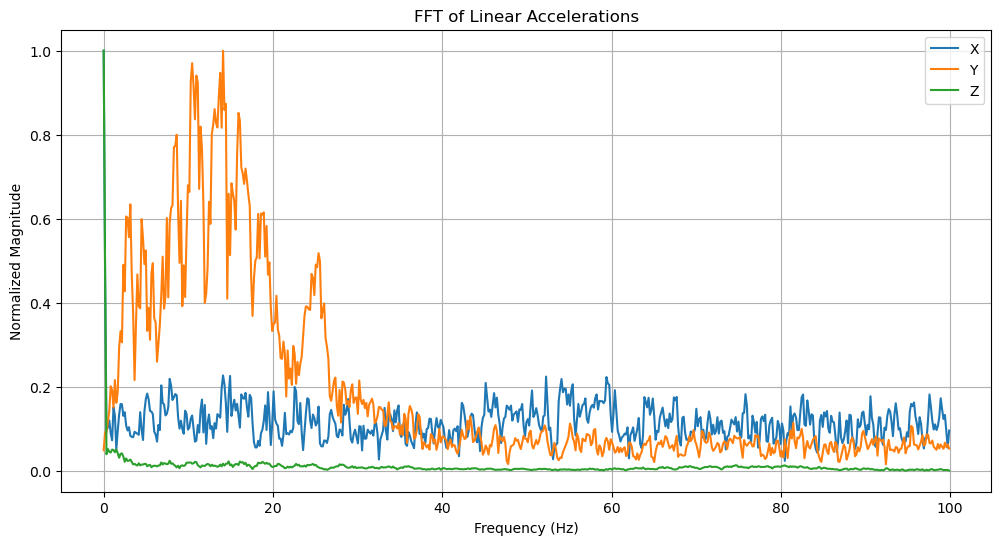

In [254]:
freqs, ffts = compute_fft_ros(imu_df, sens='acc')

plt.figure(figsize=(12,6))
for axis, fft in ffts.items():
    fft_norm = fft / np.max(fft)
    plt.plot(freqs, fft_norm, label=axis)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude')
plt.title('FFT of Linear Accelerations')
plt.legend()
plt.grid(True)
plt.show()

applying low pass filter on the imu data:

In [259]:
# Parameters
LPF_FREQ = 40  # Cutoff frequency in Hz
dt = 1 / 1100  # Sampling time in seconds
alpha = (2.0 * np.pi * LPF_FREQ * dt) / (2.0 * np.pi * LPF_FREQ * dt + 1.0)

# Create a copy of the DataFrame to hold the filtered data
IMU_LPF = imu_df[['ang_vel_x', 'ang_vel_y', 'ang_vel_z']].copy()

# Apply the LPF to each column
for col in IMU_LPF.columns:
    # Initialize the first value of the filtered column explicitly
    IMU_LPF.loc[IMU_LPF.index[0], col] = IMU_LPF.loc[IMU_LPF.index[0], col]  # No filtering for the first value

    # Apply the LPF iteratively
    for i in range(1, len(IMU_LPF)):
        IMU_LPF.loc[IMU_LPF.index[i], col] = (
            alpha * IMU_LPF.loc[IMU_LPF.index[i], col] +
            (1 - alpha) * IMU_LPF.loc[IMU_LPF.index[i-1], col]
        )

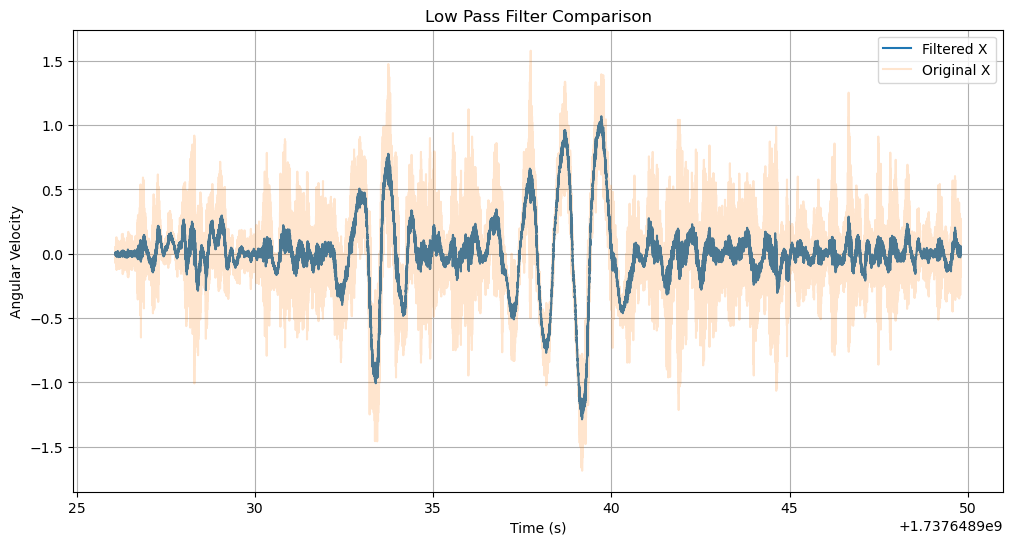

In [263]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(imu_df['timestamp'], IMU_LPF['ang_vel_z'], label='Filtered X')
plt.plot(imu_df['timestamp'], imu_df['ang_vel_z'], label='Original X', alpha=0.2)
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity')
plt.title('Low Pass Filter Comparison')
plt.legend()
plt.grid(True)
plt.show()

Trying the same but with HPF:

In [275]:

HPF_FREQ = 5
dt = 1/1100
alpha = (1/ (2 * np.pi * HPF_FREQ * dt + 1))

IMU_HPF = imu_df[['timestamp', 'ang_vel_x', 'ang_vel_y', 'ang_vel_z']].copy()
prev_filtered = IMU_HPF.iloc[0][['ang_vel_x', 'ang_vel_y', 'ang_vel_z']].copy()

for col in ['ang_vel_x', 'ang_vel_y', 'ang_vel_z']:
   for i in range(1, len(IMU_HPF)):
       new_value = IMU_HPF.iloc[i][col]
       prev_value = imu_df.iloc[i-1][col]
       filtered = alpha * (prev_filtered[col] + new_value - prev_value)
       prev_filtered[col] = filtered
       IMU_HPF.iloc[i, IMU_HPF.columns.get_loc(col)] = filtered

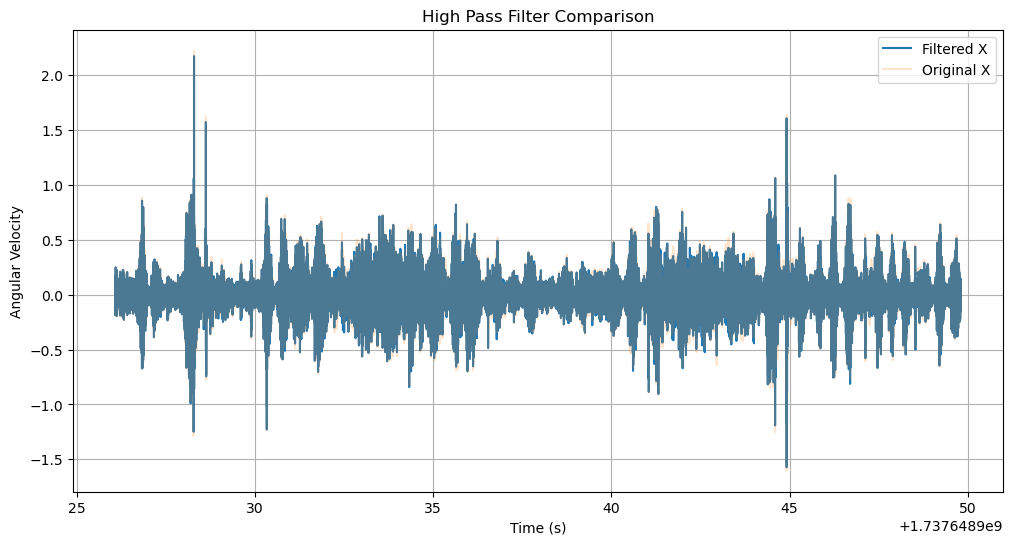

In [276]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(imu_df['timestamp'], IMU_HPF['ang_vel_x'], label='Filtered X')
plt.plot(imu_df['timestamp'], imu_df['ang_vel_x'], label='Original X', alpha=0.2)
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity')
plt.title('High Pass Filter Comparison')
plt.legend()
plt.grid(True)
plt.show()